# Analiza statystycznych danych ze Spotify pod kątem popularności wykonawców i utworów

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Przygotowanie danych

In [2]:
# Zwiększenie wyświetlania
pd.options.display.max_columns=500
pd.options.display.max_rows=500

# Ustalenie kolumn
columns = ['Country', 'Popularity', 'Title', 'Artist', 'Artist_followers', 'Explicit',	'Album', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acoustics', 'instrumentalness', 'liveliness', 'valence', 'tempo', 'duration_ms', 'Genre_new', 'Popu_max', 'Cluster']

# Wczytanie danych
spotify = pd.read_csv("Database to calculate popularity.csv", index_col=0, low_memory=False)
spotify_final = pd.read_csv('Final database.csv', low_memory=False, usecols=columns, na_values='n')

In [3]:
# Usunięcie kolumny 'uri', która nie jest potrzebna do analizy
spotify.drop(columns=['uri'], inplace=True)

# Usunięcie ostatniego wiersza NaN, która nie jest potrzebna do analizy
spotify.drop(spotify.index[-1], inplace=True)

# Zamiana kolumny 'date' na typ datetime
spotify['date'] = pd.to_datetime(spotify['date'])

# Dodanie kolumny 'year' na podstawie kolumny 'date'
spotify['year'] = spotify['date'].dt.year

# Dodanie kolumny 'month' na podstawie kolumny 'date'
spotify['month'] = spotify['date'].dt.month

# Dodanie kolumny 'day' na podstawie kolumny 'date'
spotify['day'] = spotify['date'].dt.day

# Usunięcie kolumny 'date', która nie jest potrzebna do analizy
spotify.drop(columns=['date'], inplace=True)

# Usuwanie wartości NaN z kolumn
spotify.dropna(subset=['position'], inplace=True)
spotify.dropna(subset=['day'], inplace=True)
spotify.dropna(subset=['month'], inplace=True)
spotify.dropna(subset=['year'], inplace=True)

# Zamiana kolumn liczbowych na int
spotify['position'] = spotify['position'].astype(int)
spotify['day'] = spotify['day'].astype(int)
spotify['month'] = spotify['month'].astype(int)
spotify['year'] = spotify['year'].astype(int)

# Zamiana kolumn object na category
spotify.country = spotify.country.astype('category')
spotify.track = spotify.track.astype('category')
spotify.title = spotify.title.astype('category')
spotify.artist = spotify.artist.astype('category')

/var/folders/4d/b5zn6jj10d3bz3jfx1x7rggw0000gn/T/ipykernel_1378/3010640429.py:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  spotify['date'] = pd.to_datetime(spotify['date'])


In [4]:
# Zamiana brakujących danych
spotify_final.replace('n\x07', np.nan, inplace=True)
spotify_final['Artist_followers'] = spotify_final['Artist_followers'].replace('n-a', 0)
spotify_final['Explicit'] = spotify_final['Explicit'].replace({'True': True, 'False': False, 'n-a': False})

# Zmiana typów
spotify_final['Country'] = spotify_final['Country'].astype('category')
spotify_final['Title'] = spotify_final['Title'].astype('category')
spotify_final['Artist'] = spotify_final['Artist'].astype('category')
spotify_final['Artist_followers'] = spotify_final['Artist_followers'].astype(float)
spotify_final['Explicit'] = spotify_final['Explicit'].astype(bool)
spotify_final['Album'] = spotify_final['Album'].astype('category')
spotify_final = spotify_final.astype({col: float for col in spotify_final.columns[7:19]})
spotify_final['Genre_new'] = spotify_final['Genre_new'].astype('category')
spotify_final['Cluster'] = spotify_final['Cluster'].astype('category')

# Ujednolicenie gatunków
spotify_final.replace({'hip hop' : 'rap' , 'trap' : 'rap'}, inplace=True)

In [5]:
# Stworzenie filtra Polska
spotify_final_p = spotify_final.loc[(spotify_final['Country'] == 'Poland')]

## Top artyści oraz utwory w PL

In [6]:
# Najpopularniejsi artyści w Polsce w 2017 roku
spotify_2017_pl_art = spotify.loc[(spotify['country'] == 'Poland') & (spotify['year'] == 2017)]
top_artists_2017_pl = spotify_2017_pl_art.groupby('artist')['position'].count().sort_values(ascending=False).head(10)

# Najpopularniejsi artyści w Polsce w 2018 roku
spotify_2018_pl_art = spotify.loc[(spotify['country'] == 'Poland') & (spotify['year'] == 2018)]
top_artists_2018_pl = spotify_2018_pl_art.groupby('artist')['position'].count().sort_values(ascending=False).head(10)

# Najpopularniejsi artyści w Polsce w 2019 roku
spotify_2019_pl_art = spotify.loc[(spotify['country'] == 'Poland') & (spotify['year'] == 2019)]
top_artists_2019_pl = spotify_2019_pl_art.groupby('artist')['position'].count().sort_values(ascending=False).head(10)

# Najpopularniejsi artyści w Polsce w 2020 roku
spotify_2020_pl_art = spotify.loc[(spotify['country'] == 'Poland') & (spotify['year'] == 2020)]
top_artists_2020_pl = spotify_2020_pl_art.groupby('artist')['position'].count().sort_values(ascending=False).head(10)

# Najpopularniejsi artyści w Polsce w latach 2017 - 2020
top_artists_pl = spotify.loc[(spotify['country'] == 'Poland')].groupby('artist')['position'].count().sort_values(ascending=False).head(10)

# Najpopularniejsze utwory w Polsce w 2017 roku:
spotify_2017_pl = spotify.loc[(spotify['country'] == 'Poland') & (spotify['year'] == 2017)]
top_songs_2017_pl = spotify_2017_pl.groupby('track')['position'].count().sort_values(ascending=False).head(20)

# Najpopularniejsze utwory w Polsce w 2018 roku:
spotify_2018_pl = spotify.loc[(spotify['country'] == 'Poland') & (spotify['year'] == 2018)]
top_songs_2018_pl = spotify_2018_pl.groupby('track')['position'].count().sort_values(ascending=False).head(20)

# Najpopularniejsze utwory w Polsce w 2019 roku:
spotify_2019_pl = spotify.loc[(spotify['country'] == 'Poland') & (spotify['year'] == 2019)]
top_songs_2019_pl = spotify_2019_pl.groupby('track')['position'].count().sort_values(ascending=False).head(20)

# Najpopularniejsze utwory w Polsce w 2020 roku:
spotify_2020_pl = spotify.loc[(spotify['country'] == 'Poland') & (spotify['year'] == 2020)]
top_songs_2020_pl = spotify_2020_pl.groupby('track')['position'].count().sort_values(ascending=False).head(35)

#  Najpopularniejsze utwory w Polsce w latach 2017 - 2020
top_songs_pl = spotify.loc[(spotify['country'] == 'Poland')].groupby('track')['position'].count().sort_values(ascending=False).head(20)


### Top artyści w PL w latach 2017 - 2020

In [7]:
top_artists_2017_pl

artist
 Ed Sheeran            3136
 Taco Hemingway        3018
 Imagine Dragons       1658
 Quebonafide           1434
 Major Lazer           1075
 Shawn Mendes           987
 Twenty One Pilots      862
 Sia                    683
 The Chainsmokers       679
 Kendrick Lamar         679
Name: position, dtype: int64

In [8]:
top_artists_2018_pl

artist
 Taco Hemingway                              2531
 TACONAFIDE, Quebonafide, Taco Hemingway     2333
 Dawid Podsiadło                             1560
 Imagine Dragons                             1357
 XXXTENTACION                                1217
 Young Igi                                   1058
 Bedoes, Kubi Producent                      1006
 Ed Sheeran                                   954
 Post Malone                                  884
 Dua Lipa                                     760
Name: position, dtype: int64

In [9]:
top_artists_2019_pl

artist
 Dawid Podsiadło     2233
 Billie Eilish       2026
 chillwagon          1734
 White 2115          1315
 PRO8L3M             1182
 Taco Hemingway      1163
 schafter            1055
 Szpaku               971
 Ariana Grande        950
 Ed Sheeran           933
Name: position, dtype: int64

In [10]:
top_artists_2020_pl

artist
 Mata                2059
 Bedoes, Lanek       1853
 White 2115          1448
 chillwagon          1087
 Żabson              1070
 sanah               1017
 Billie Eilish        890
 Dawid Podsiadło      879
 Dua Lipa             876
 Taco Hemingway       834
Name: position, dtype: int64

In [11]:
top_artists_pl

artist
 Taco Hemingway                              7546
 Ed Sheeran                                  5318
 Dawid Podsiadło                             5118
 Imagine Dragons                             3641
 Billie Eilish                               3359
 White 2115                                  3353
 TACONAFIDE, Quebonafide, Taco Hemingway     3284
 chillwagon                                  2821
 PRO8L3M                                     2629
 Bedoes, Lanek                               2545
Name: position, dtype: int64

In [12]:
# Najczęściej występujący artyści w PL - ilość utworów w zestawieniu
spotify_final_p['Artist'].value_counts().head(10)

PRO8L3M                60
Taco Hemingway         54
BTS                    54
Ariana Grande          47
Imagine Dragons        39
Drake                  38
Ed Sheeran             36
5 Seconds of Summer    36
Lana Del Rey           36
White 2115             35
Name: Artist, dtype: int64

### Top utwory w PL w latach 2017 - 2020

In [13]:
top_songs_2017_pl

track
 Rocka,e  , Clean Bandit                                                            359
 Deszcz Na Betonie , Taco Hemingway                                                 357
 I Don’t Wanna Live Forever  - From "Fifty Shades Darker " , ZAYN, Taylor Swift     357
 Shape of You , Ed Sheeran                                                          356
 Human , Rag'n'Bone Man                                                             354
 Solo Dance , Martin Jensen                                                         353
 Szaman , Paluch                                                                    350
 Gdy,ś Kiedyś , Paluch                                                              349
 Treat You Better , Shawn Mendes                                                    343
 Następna stacja , Taco Hemingway                                                   342
 Radioactive , Imagine Dragons                                                      338
 Do I Wanna Know? , Arctic

In [14]:
top_songs_2018_pl

track
 05:05 , Bedoes, Kubi Producent              365
 Nowy Kolor , Otsochodzi, Taco Hemingway     364
 Believer , Imagine Dragons                  363
 Shape of You , Ed Sheeran                   363
 Feel It Still , Portugal. The Man           363
 More Than You Know , Axwell /\ Ingrosso     361
 IDGAF , Dua Lipa                            360
 New Rules , Dua Lipa                        355
 Half Dead , Quebonafide, Reto               354
 Nie / nie , Otsochodzi                      351
 Thunder , Imagine Dragons                   340
 Havana  , Camila Cabello                    339
 W Dobrą Stronę , Dawid Podsiadło            334
 Mówiłaś , Young Igi                         328
 These Days  , Rudimental                    325
 FRIENDS , Marshmello, Anne-Marie            315
 SAD! , XXXTENTACION                         304
 Buzi , Young Igi                            295
 Uzależniony  , Smolasty                     295
 XO Tour Llif3 , Lil Uzi Vert                295
Name: position

In [15]:
top_songs_2019_pl

track
 Chłopaki nie płaczą , Bedoes, Kubi Producent, Taco Hemingway                             365
 Surfer , be vis                                                                          365
 Outside , Kartky, HVZX                                                                   364
 Trofea , Dawid Podsiadło                                                                 364
 when the party's over , Billie Eilish                                                    364
 Bestia , Young Igi                                                                       364
 Płuca zlepione topami , Guzior                                                           364
 Hinata , Szpaku                                                                          364
 Delfin , Bedoes, Kubi Producent, Koldi, Young Multi, Beteo                               364
 UA , Reto                                                                                364
 05:05 , Bedoes, Kubi Producent                       

In [16]:
years = [2017, 2018, 2019, 2020]
song_pl = [4, 4, 12, 27]
song_nopl = [6, 6, 2, 6]

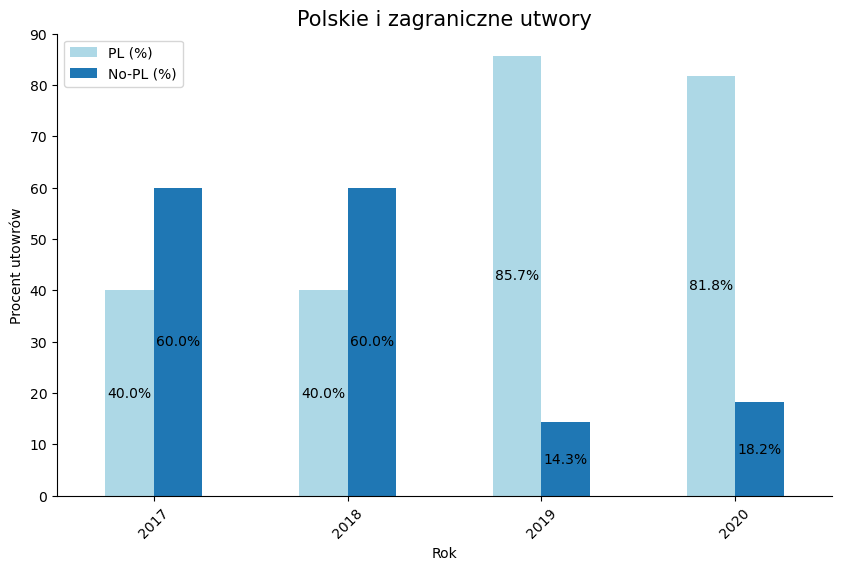

In [17]:
# Tworzenie ramki danych
data = {'Year': years, 'PL': song_pl, 'No-PL': song_nopl}
df2 = pd.DataFrame(data)

# Obliczanie procentowego udziału utworów w każdym roku
df2['PL (%)'] = df2['PL'] / (df2['PL'] + df2['No-PL']) * 100
df2['No-PL (%)'] = df2['No-PL'] / (df2['PL'] + df2['No-PL']) * 100

# Tworzenie wykresu barplot
fig, ax = plt.subplots(figsize=(10, 6))
df2[['PL (%)', 'No-PL (%)']].plot(kind='bar', stacked=False, ax=ax, color=['lightblue', '#1f77b4'])

# Ustawienie tytułu i etykiet osi
ax.set_title("Polskie i zagraniczne utwory", fontsize=15)
ax.set_xlabel("Rok")
ax.set_ylabel("Procent utowrów")

# Dodanie etykiet na słupki
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f"{height:.1f}%", (x + width / 2, y + height / 2), ha='center', va='center')

# Ustawienia wyświetlania
ax.set_xticklabels(years, rotation=45)
sns.despine(right=True, top=True)

# Wyświetlenie wykresu
plt.show()

In [18]:
# Top 10 utworów w latach 2017 - 2020
pd.options.display.max_colwidth=500
top10 = spotify_final_p[['Popularity', 'Title', 'Artist', 'Artist_followers', 'Genre_new']].sort_values('Popularity', ascending=False).head(10)
top10

,Popularity,Title,Artist,Artist_followers,Genre_new
52664,202433.55,shape of you,Ed Sheeran,71783101.0,pop
159041,121230.95,początek,Męskie Granie Orkiestra 2018 - Kortez - Dawid Podsiadło - Krzysztof Zalewski,124959.0,indie
159225,113605.20,chłopaki nie płaczą,Bedoes - Kubi Producent - Taco Hemingway,874295.0,rap
160149,112508.55,california,White 2115,404971.0,rap
83423,109888.60,bad guy,Billie Eilish,34697267.0,pop
159057,104350.35,język ciała,Tymek - Big Scythe,552272.0,rap
158952,102377.90,8 kobiet - remix,TACONAFIDE - Quebonafide - Taco Hemingway - Bedoes,593813.0,rap
158718,100803.25,tamagotchi,TACONAFIDE - Quebonafide - Taco Hemingway,593813.0,rap
19840,99976.35,feel it still,Portugal. The Man,1152895.0,rock
160482,98100.60,bestia,Young Igi,430134.0,rap


## Gatunki muzyczne

In [19]:
# Suma utworów dla poszczególnych gatunków muzyki w PL
spotify_final_p['Genre_new'].value_counts()

rap                 2007
pop                 1731
rock                 288
indie                270
else                 194
dance/electronic     172
house                162
r&b/soul             119
k-pop                107
metal                101
boy band              67
latin                 25
funk                  21
country                5
reggae                 2
jazz                   1
reggaeton              1
opm                    0
bolero                 0
Name: Genre_new, dtype: int64

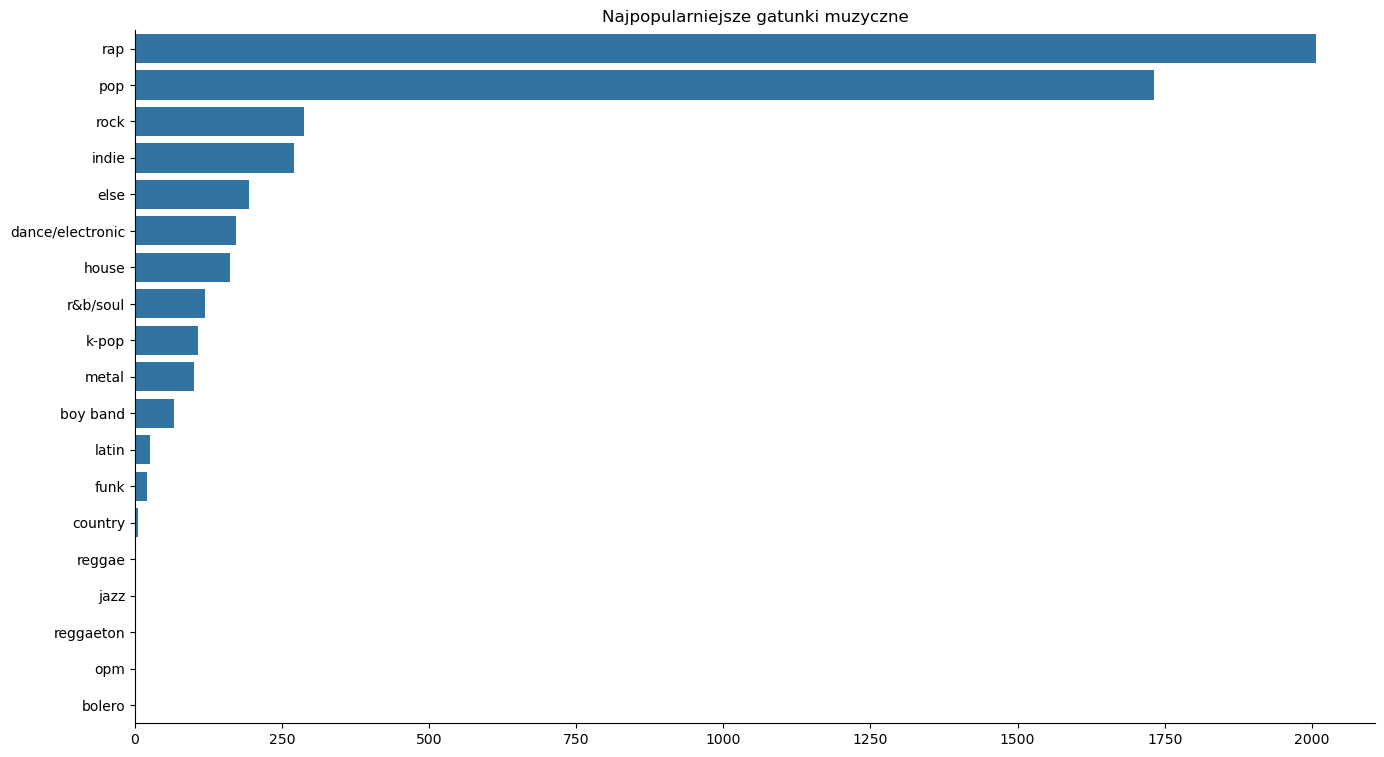

In [20]:
genre_counts = spotify_final_p['Genre_new'].value_counts().sort_values(ascending=False)

# Tworzenie wykresu słupkowego
plt.figure(figsize=(16, 9))
sns.barplot(y=genre_counts.index, x=genre_counts.values, order=genre_counts.index, color='#1f77b4')
# Ustawienie tytułu
plt.title('Najpopularniejsze gatunki muzyczne')
sns.despine(right=True, top=True)
plt.show()

In [22]:
# Wyświetlenie najpopularniejszych utworów w PL
spotify_final_p.sort_values('Popularity', ascending=False).head(10)

,Country,Popularity,Title,Artist,Artist_followers,Explicit,Album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,Genre_new,Popu_max,Cluster
52664,Poland,202433.55,shape of you,Ed Sheeran,71783101.0,False,÷ (Deluxe),0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,pop,1,english speaking and nordic
159041,Poland,121230.95,początek,Męskie Granie Orkiestra 2018 - Kortez - Dawid Podsiadło - Krzysztof Zalewski,124959.0,False,Początek,0.771,0.703,8.0,-6.299,0.0,0.0423,0.0628,0.000000,0.0847,0.954,110.001,236013.0,indie,2,english speaking and nordic
159225,Poland,113605.20,chłopaki nie płaczą,Bedoes - Kubi Producent - Taco Hemingway,874295.0,False,Kwiat polskiej młodzieży,0.680,0.519,9.0,-11.125,0.0,0.1130,0.2850,0.000001,0.0973,0.238,95.004,211800.0,rap,1,english speaking and nordic
160149,Poland,112508.55,california,White 2115,404971.0,False,Rockstar,0.682,0.675,2.0,-8.290,1.0,0.0486,0.2510,0.000004,0.2570,0.617,134.974,192760.0,rap,5,english speaking and nordic
83423,Poland,109888.60,bad guy,Billie Eilish,34697267.0,False,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",0.701,0.425,7.0,-10.965,1.0,0.3750,0.3280,0.130000,0.1000,0.562,135.128,194088.0,pop,1,english speaking and nordic
159057,Poland,104350.35,język ciała,Tymek - Big Scythe,552272.0,True,Klubowe,0.720,0.722,1.0,-6.621,0.0,0.1740,0.7620,0.000000,0.0706,0.686,127.972,201107.0,rap,1,english speaking and nordic
158952,Poland,102377.90,8 kobiet - remix,TACONAFIDE - Quebonafide - Taco Hemingway - Bedoes,593813.0,False,"0,25 mg",0.725,0.571,8.0,-7.642,1.0,0.1280,0.4780,0.000000,0.1120,0.267,140.047,270813.0,rap,4,english speaking and nordic
158718,Poland,100803.25,tamagotchi,TACONAFIDE - Quebonafide - Taco Hemingway,593813.0,False,"Soma 0,5 mg",0.757,0.731,2.0,-6.269,1.0,0.1940,0.3260,0.000000,0.1860,0.386,111.989,201829.0,rap,1,english speaking and nordic
19840,Poland,99976.35,feel it still,Portugal. The Man,1152895.0,False,Woodstock,0.801,0.795,1.0,-5.115,0.0,0.0504,0.0417,0.000113,0.0717,0.754,79.028,163253.0,rock,3,english speaking and nordic
160482,Poland,98100.60,bestia,Young Igi,430134.0,True,Konfetti,0.748,0.441,7.0,-10.026,1.0,0.1640,0.5940,0.000000,0.1090,0.418,94.067,197886.0,rap,2,english speaking and nordic


## Analiza cech utworów

In [23]:
# Wybór istotnych cech utworów
spotify_final_p[['danceability', 'energy', 'tempo', 'loudness', 'valence', 'duration_ms']].describe()

,danceability,energy,tempo,loudness,valence,duration_ms
count,5272.000000,5272.000000,5272.000000,5272.000000,5272.000000,5272.000000
mean,0.656035,0.647153,121.293237,-6.874785,0.474683,209072.404021
std,0.141517,0.170472,27.670897,2.666112,0.219789,49911.076290
min,0.151000,0.012600,44.565000,-29.256000,0.026200,34200.000000
25%,0.571750,0.550000,100.007000,-8.110250,0.304750,181276.000000
50%,0.673000,0.668000,120.038000,-6.460000,0.466000,204710.000000
75%,0.756000,0.770000,139.955500,-5.108500,0.642000,231053.000000
max,0.972000,0.995000,213.751000,0.175000,0.982000,943529.000000


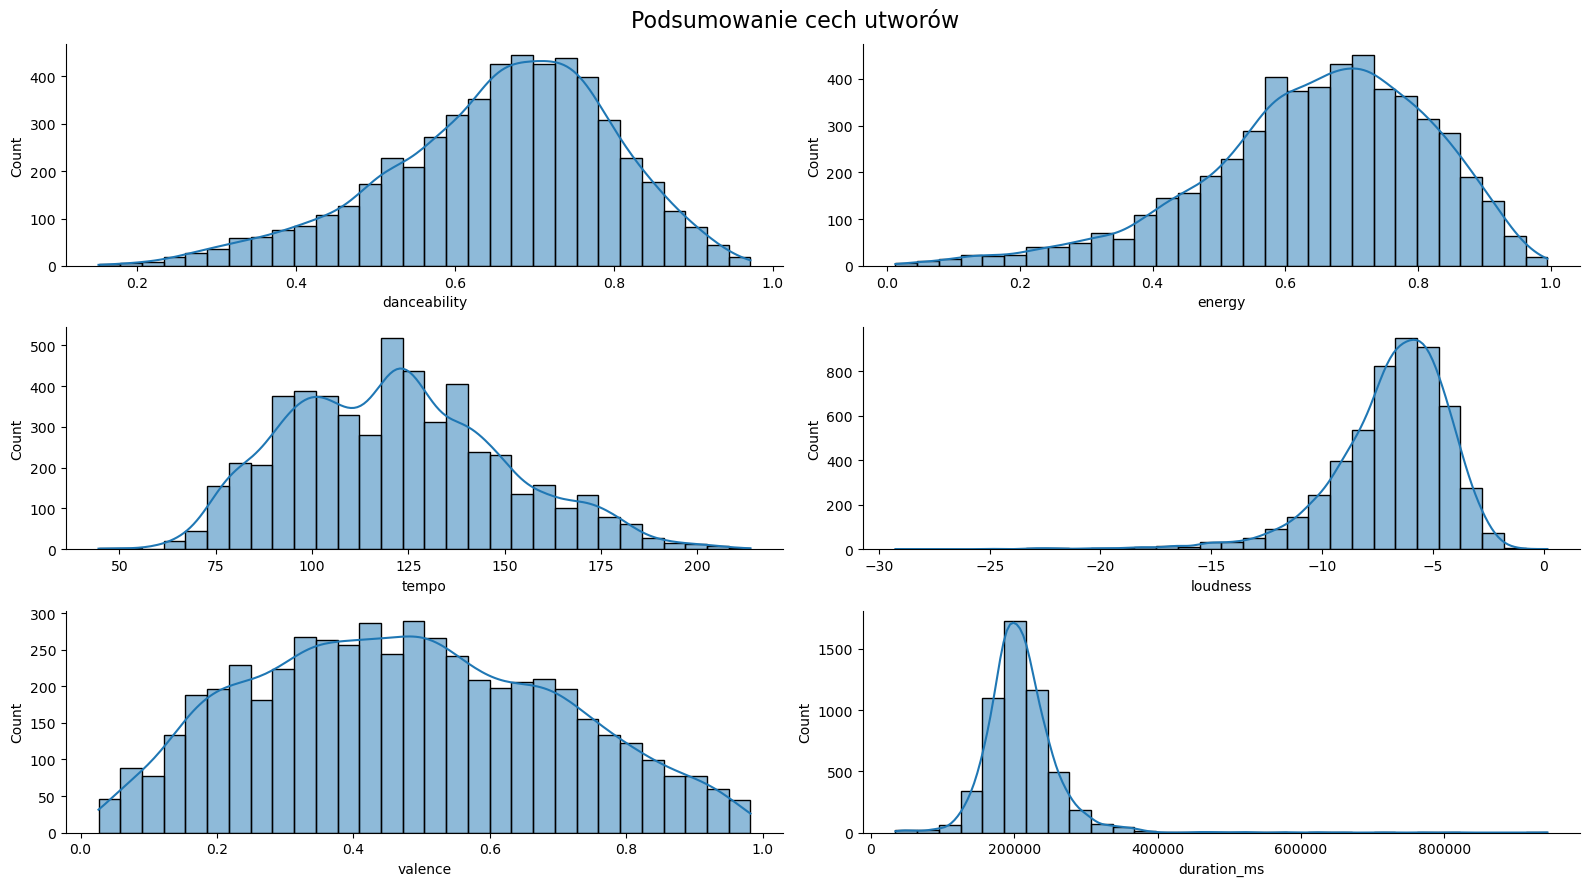

In [24]:
# Histogramy
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(16, 9))
sns.histplot(data=spotify_final_p, x='danceability', kde=True, bins=30, ax=axs[0][0])
sns.histplot(data=spotify_final_p, x='energy', kde=True, bins=30, ax=axs[0][1])
sns.histplot(data=spotify_final_p, x='tempo', kde=True, bins=30, ax=axs[1][0])
sns.histplot(data=spotify_final_p, x='loudness', kde=True, bins=30, ax=axs[1][1])
sns.histplot(data=spotify_final_p, x='valence', kde=True, bins=30, ax=axs[2][0])
sns.histplot(data=spotify_final_p, x='duration_ms', kde=True, bins=30, ax=axs[2][1])
plt.suptitle('Podsumowanie cech utworów', fontsize=16)
sns.despine(right=True, top=True)
plt.tight_layout()
plt.show()

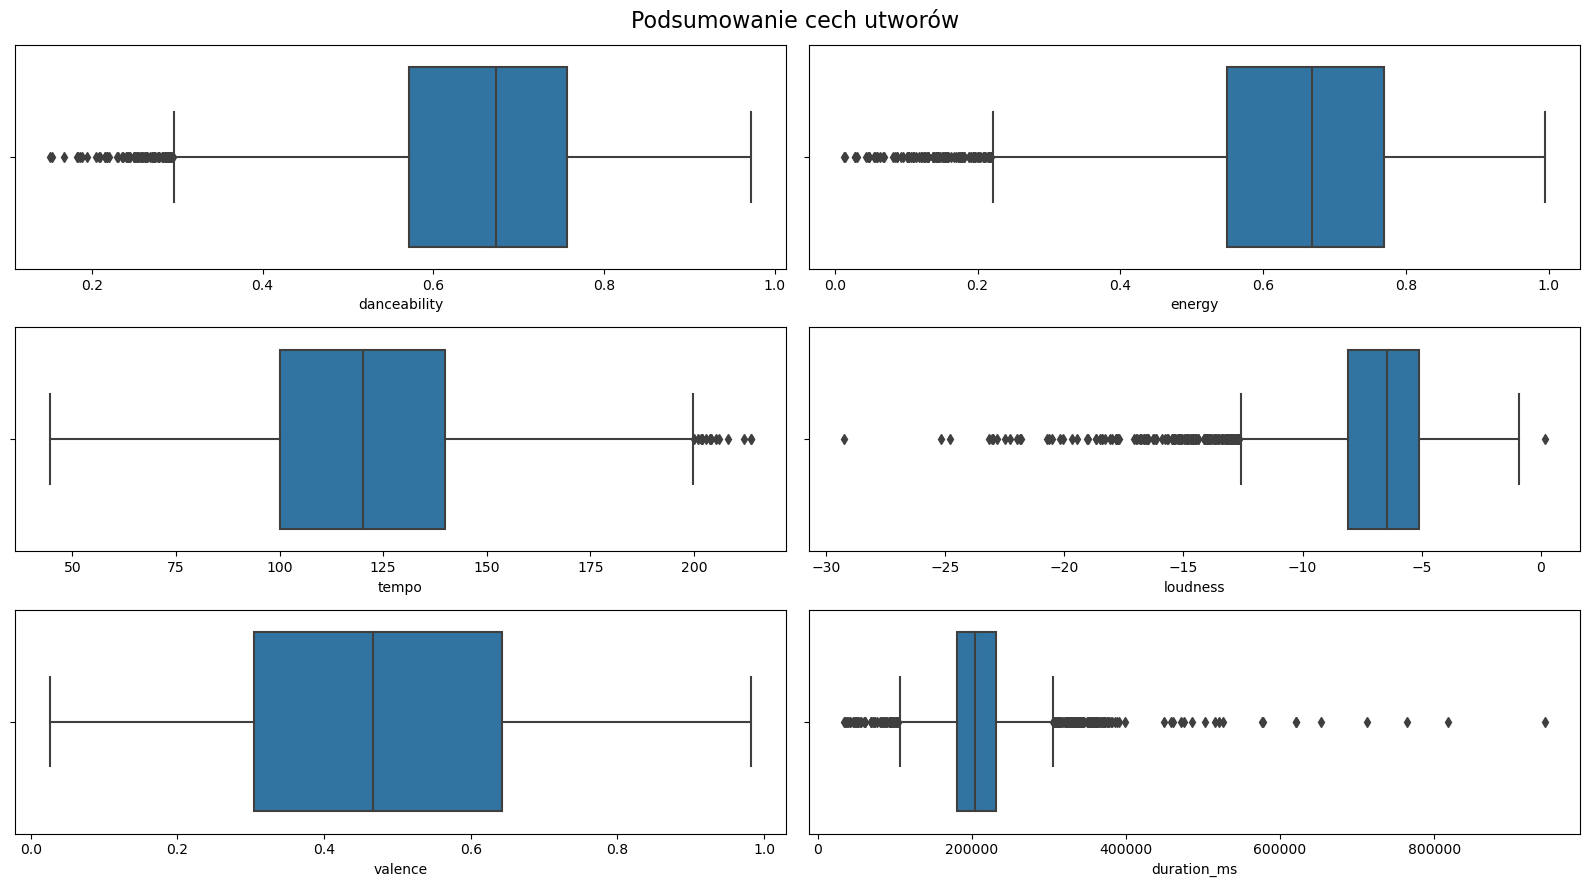

In [25]:
# Boxplot
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(16, 9))
sns.boxplot(data=spotify_final_p, x='danceability', ax=axs[0][0])
sns.boxplot(data=spotify_final_p, x='energy', ax=axs[0][1])
sns.boxplot(data=spotify_final_p, x='tempo', ax=axs[1][0])
sns.boxplot(data=spotify_final_p, x='loudness', ax=axs[1][1])
sns.boxplot(data=spotify_final_p, x='valence', ax=axs[2][0])
sns.boxplot(data=spotify_final_p, x='duration_ms', ax=axs[2][1])
plt.suptitle('Podsumowanie cech utworów', fontsize=16)
plt.tight_layout()
plt.show()

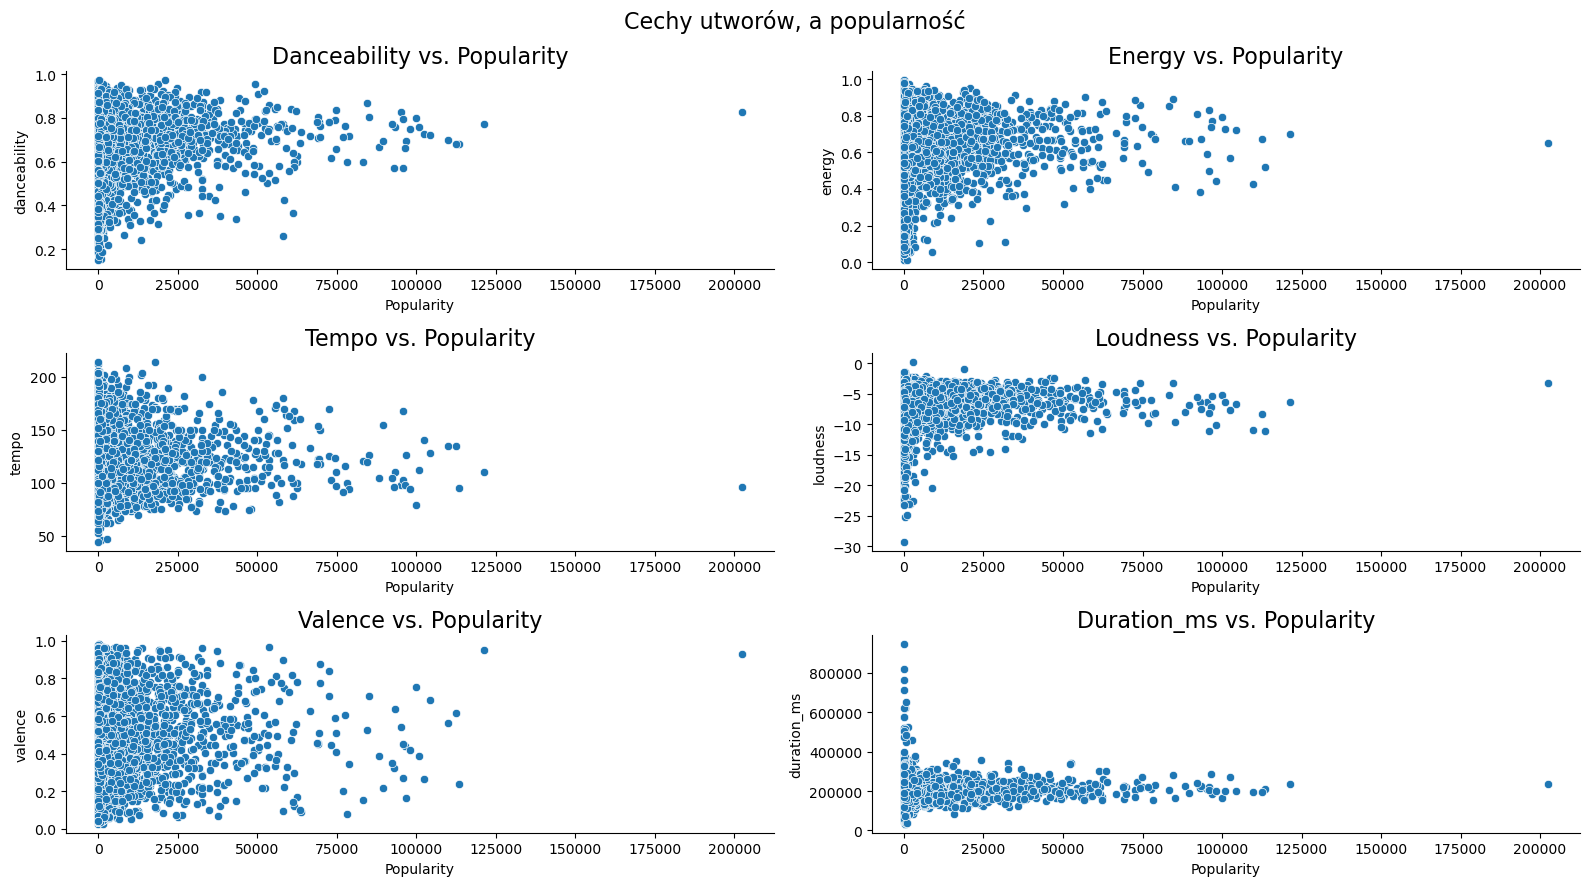

In [26]:
# Wykresy cech do poupularności
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(16, 9))
sns.scatterplot(data=spotify_final_p, x='Popularity', y='danceability', ax=axs[0][0])
axs[0][0].set_title('Danceability vs. Popularity', size=16)
sns.scatterplot(data=spotify_final_p, x='Popularity', y='energy', ax=axs[0][1])
axs[0][1].set_title('Energy vs. Popularity', size=16)
sns.scatterplot(data=spotify_final_p, x='Popularity', y='tempo', ax=axs[1][0])
axs[1][0].set_title('Tempo vs. Popularity', size=16)
sns.scatterplot(data=spotify_final_p, x='Popularity', y='loudness', ax=axs[1][1])
axs[1][1].set_title('Loudness vs. Popularity', size=16)
sns.scatterplot(data=spotify_final_p, x='Popularity', y='valence', ax=axs[2][0])
axs[2][0].set_title('Valence vs. Popularity', size=16)
sns.scatterplot(data=spotify_final_p, x='Popularity', y='duration_ms', ax=axs[2][1])
axs[2][1].set_title('Duration_ms vs. Popularity', size=16)
plt.suptitle('Cechy utworów, a popularność', fontsize=16)
sns.despine(right=True, top=True)
plt.tight_layout()
plt.show()

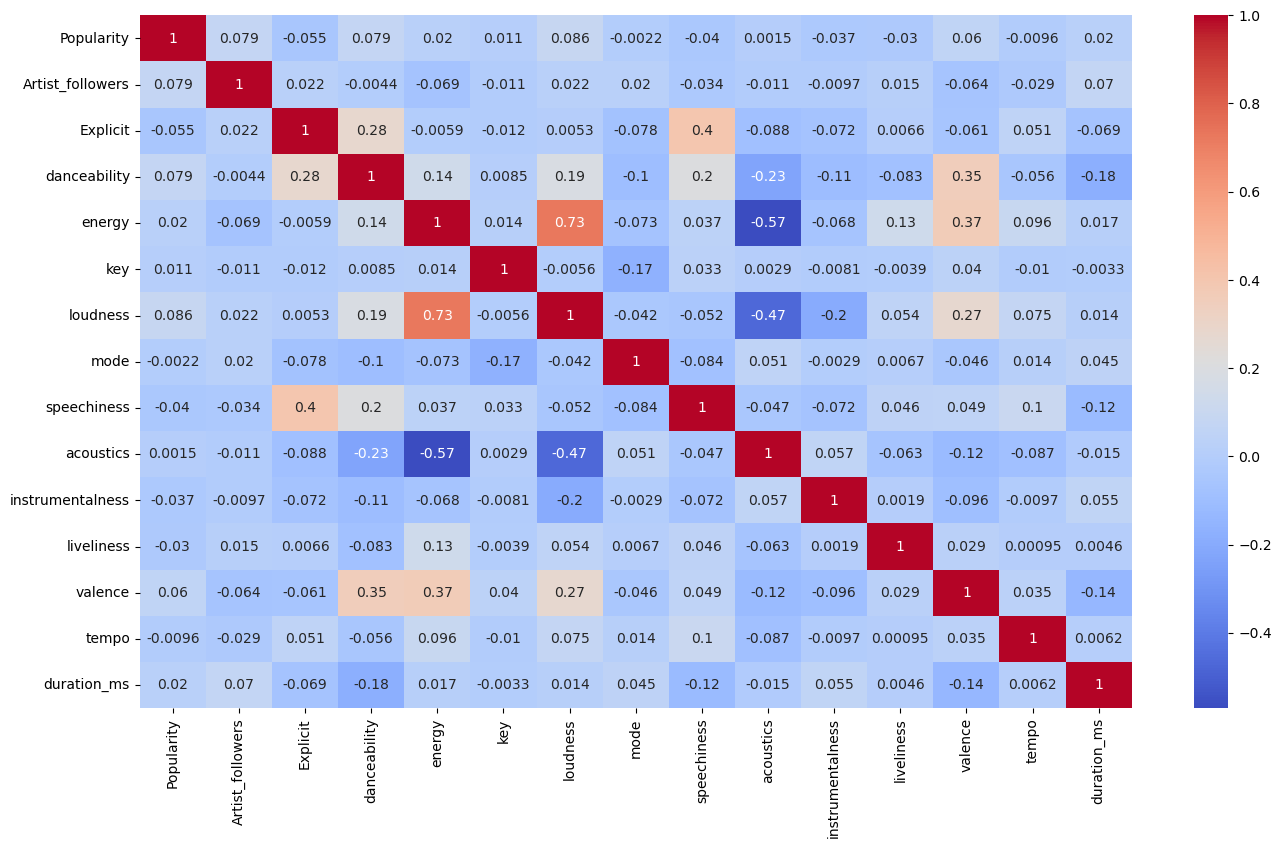

In [27]:
# Mapa korelacji
plt.figure(figsize=(16, 9))
sns.heatmap(spotify_final[['Popularity', 'Artist_followers',
       'Explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acoustics', 'instrumentalness', 'liveliness',
       'valence', 'tempo', 'duration_ms']].corr(), annot=True, cmap='coolwarm')
plt.show()

## Pominięcie outliera - 'shape of you' Ed Sheeran	

In [28]:
spotify_final_p = spotify_final_p.sort_values('Popularity', ascending=False).drop(index=52664)

In [29]:
top10 = spotify_final_p[['Popularity', 'Title', 'Artist', 'Artist_followers', 'Genre_new']].sort_values('Popularity', ascending=False).head(10)
top10

,Popularity,Title,Artist,Artist_followers,Genre_new
159041,121230.95,początek,Męskie Granie Orkiestra 2018 - Kortez - Dawid Podsiadło - Krzysztof Zalewski,124959.0,indie
159225,113605.20,chłopaki nie płaczą,Bedoes - Kubi Producent - Taco Hemingway,874295.0,rap
160149,112508.55,california,White 2115,404971.0,rap
83423,109888.60,bad guy,Billie Eilish,34697267.0,pop
159057,104350.35,język ciała,Tymek - Big Scythe,552272.0,rap
158952,102377.90,8 kobiet - remix,TACONAFIDE - Quebonafide - Taco Hemingway - Bedoes,593813.0,rap
158718,100803.25,tamagotchi,TACONAFIDE - Quebonafide - Taco Hemingway,593813.0,rap
19840,99976.35,feel it still,Portugal. The Man,1152895.0,rock
160482,98100.60,bestia,Young Igi,430134.0,rap
74006,96953.75,in my mind,Dynoro - Gigi D'Agostino,208733.0,dance/electronic


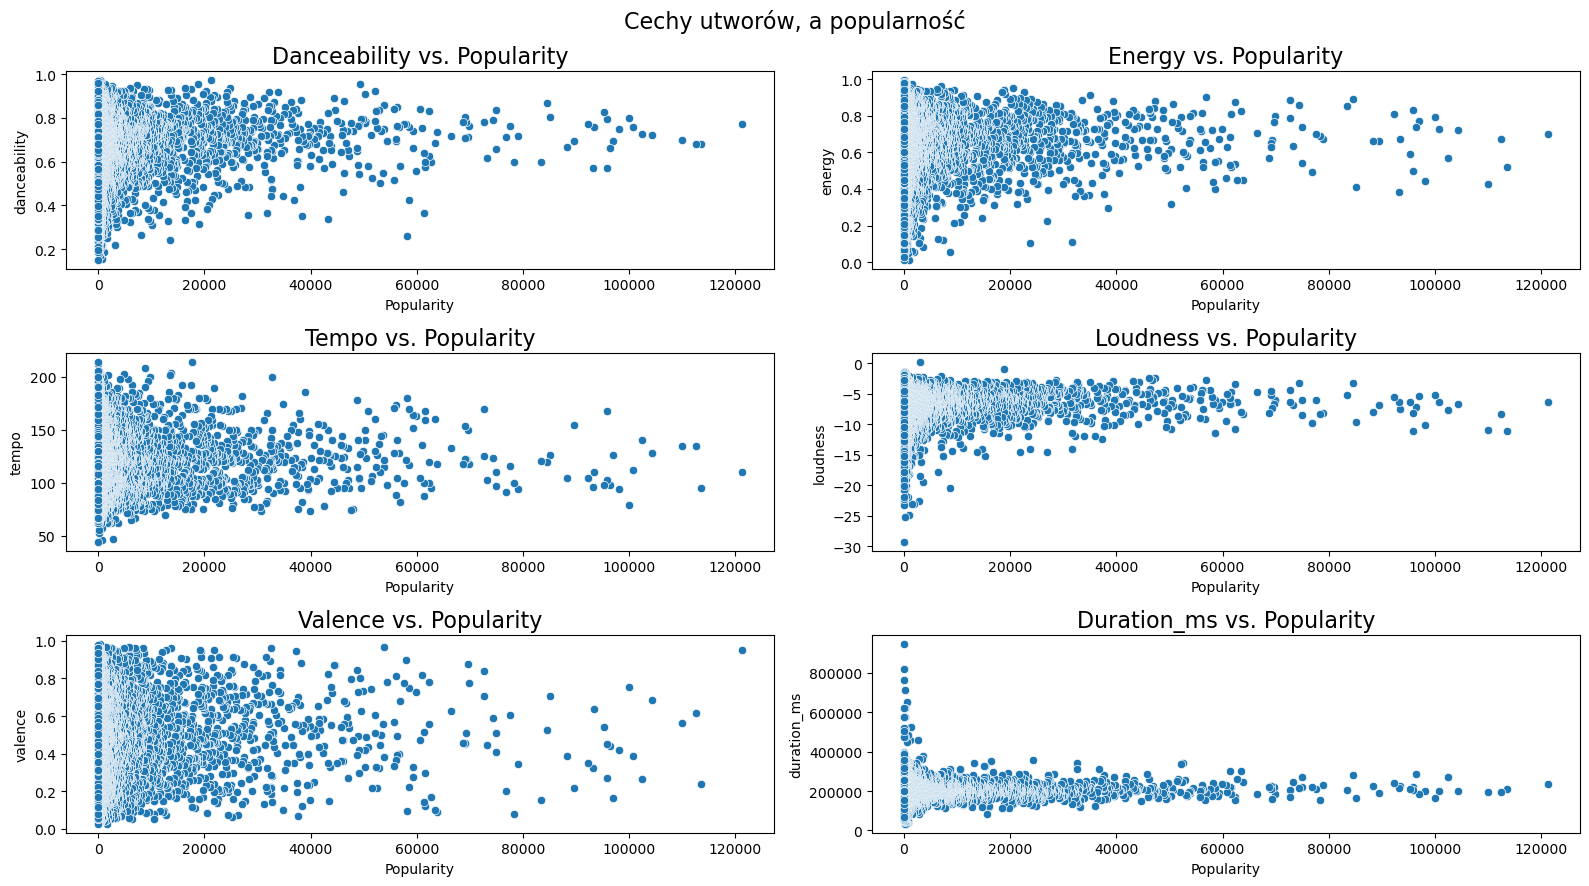

In [30]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(16, 9))
sns.scatterplot(data=spotify_final_p, x='Popularity', y='danceability', ax=axs[0][0])
axs[0][0].set_title('Danceability vs. Popularity', size=16)
sns.scatterplot(data=spotify_final_p, x='Popularity', y='energy', ax=axs[0][1])
axs[0][1].set_title('Energy vs. Popularity', size=16)
sns.scatterplot(data=spotify_final_p, x='Popularity', y='tempo', ax=axs[1][0])
axs[1][0].set_title('Tempo vs. Popularity', size=16)
sns.scatterplot(data=spotify_final_p, x='Popularity', y='loudness', ax=axs[1][1])
axs[1][1].set_title('Loudness vs. Popularity', size=16)
sns.scatterplot(data=spotify_final_p, x='Popularity', y='valence', ax=axs[2][0])
axs[2][0].set_title('Valence vs. Popularity', size=16)
sns.scatterplot(data=spotify_final_p, x='Popularity', y='duration_ms', ax=axs[2][1])
axs[2][1].set_title('Duration_ms vs. Popularity', size=16)
plt.suptitle('Cechy utworów, a popularność', fontsize=16)
plt.tight_layout()
plt.show()